There seem to be multiple plotting packages; [the `plots` package](http://docs.juliaplots.org/) *seems* to be the
best default choice? (c.f., [the `plotly` package](https://plotly.com/julia/), which seems much more complicated / flexible)

In [1]:
using Plots

In [2]:
# Fixed, randomly-generated data.
ys = [
    0.701505024166, 0.532131076981, 0.400038404965, 0.47404582646, 0.0248636754279, 0.305496537542, 0.765615148488, 0.305437979135, 0.550790400041, 0.65563383195, 0.703164620893, 0.993077608493, 0.76826987816, 0.671694548239, 0.670732644136, 0.276523160903, 0.610164008357, 0.314954134984, 0.1289232583, 0.652723847464, 0.266150542468, 0.574848817963, 0.0157602031437, 0.211492484283, 0.710677582942, 0.676034800374, 0.258903121723, 0.492661526969, 0.60157369121, 0.347904734503, 0.528713529995, 0.477419463685, 0.82106833871, 0.542547197659, 0.378880996159, 0.709257874599, 0.917979077266, 0.879853574774, 0.552979524917, 0.484276356366, 0.0383481564736, 0.889544834707, 0.74907145177, 0.741926328995, 0.578402253996, 0.593718882336, 0.294433260018, 0.562931189435, 0.944190930656, 0.164681683404, 0.794594251918, 0.00124017700623, 0.87198413222, 0.877276156615, 0.787315712135, 0.948722342008, 0.551555010155, 0.00040678236396, 0.519753662197, 0.8467653759, 0.283309520594, 0.552175201603, 0.088305105151, 0.904159808785, 0.347878643183, 0.113566042897, 0.12532047401, 0.107604110134, 0.903617710723, 0.741518404118, 0.746122573071, 0.851659514653, 0.900308456393, 0.935421770061, 0.349489069371, 0.486689453395, 0.253662091892, 0.067955461067, 0.192939455512, 0.490826636465, 0.600423602592, 0.159456420681, 0.462454407395, 0.550254102849, 0.00427055028749, 0.814172168953, 0.909994441332, 0.529427870827, 0.730391743764, 0.487501169078, 0.681885650789, 0.0896704396148, 0.76139211897, 0.230473097583, 0.390916522889, 0.130195053852, 0.757663204804, 0.449023373333, 0.746975132458, 0.585130015762
];
xs = range(1, length = length(ys));

Doing a basic plot couldn't possibly be easier:

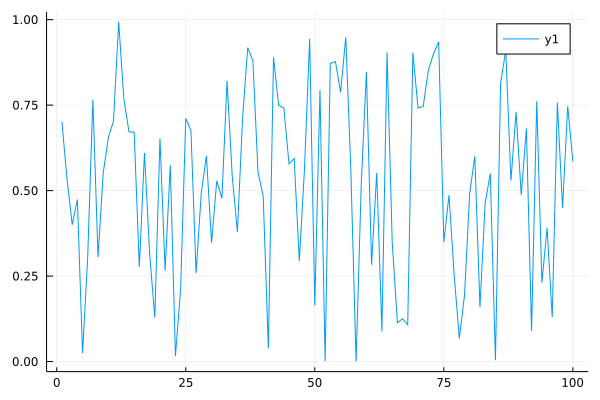

In [3]:
plot(ys)

There is also an enormous set of options via keyword args; see also [the attributes docs](http://docs.juliaplots.org/latest/attributes/).

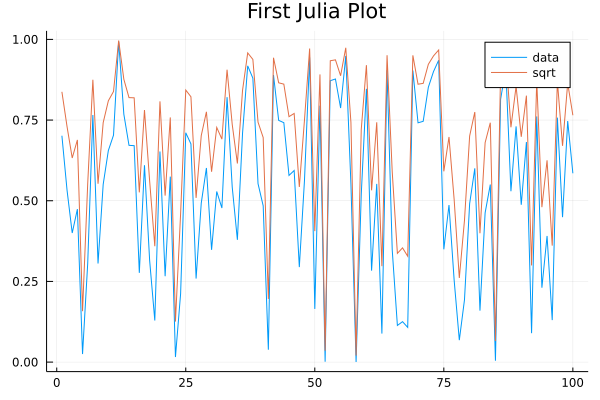

In [4]:
plot(
    xs,
    [
        ys,
        ys .^ 0.5
    ],
    title = "First Julia Plot",
    labels = [ "data" "sqrt" ]
)

We can look things up via the ordinary Julia docs:

(Sign that you have suboptimal / overly-snarky documentation:

> just try it and it will likely work as expected

)

In [5]:
? Plots.plot

The main plot command. Use `plot` to create a new plot object, and `plot!` to add to an existing one:

```
    plot(args...; kw...)                  # creates a new plot window, and sets it to be the current
    plot!(args...; kw...)                 # adds to the `current`
    plot!(plotobj, args...; kw...)        # adds to the plot `plotobj`
```

There are lots of ways to pass in data, and lots of keyword arguments... just try it and it will likely work as expected. When you pass in matrices, it splits by columns. To see the list of available attributes, use the `plotattr([attr])` function, where `attr` is the symbol `:Series`, `:Subplot`, `:Plot`, or `:Axis`. Pass any attribute to `plotattr` as a String to look up its docstring, e.g., `plotattr("seriestype")`.


As recommended, let's look up the types of plots supported:

In [6]:
plotattr("seriestype")

seriestype {Symbol}
linetype, lt, seriestypes, st, t, typ

This is the identifier of the type of visualization for this series. Choose from [:none, :line, :path, :steppre, :stepmid, :steppost, :sticks, :scatter, :heatmap, :hexbin, :barbins, :barhist, :histogram, :scatterbins, :scatterhist, :stepbins, :stephist, :bins2d, :histogram2d, :histogram3d, :density, :bar, :hline, :vline, :contour, :pie, :shape, :image, :path3d, :scatter3d, :surface, :wireframe, :contour3d, :volume, :mesh3d] or any series recipes which are defined.
Series attribute,  default: path


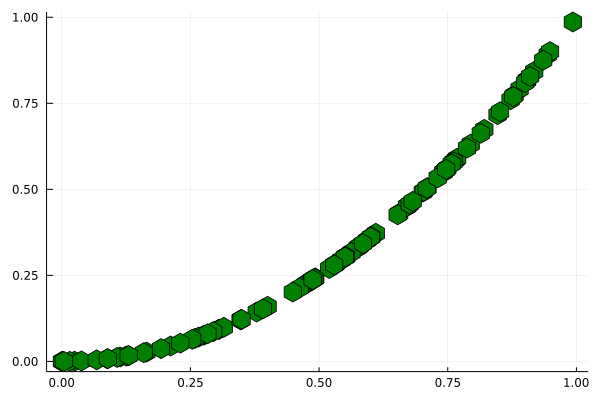

In [7]:
plot(
    ys,
    ys .^ 2,
    seriestype = :scatter,
    marker = (:hexagon, 10, :green), # This is a bit too magical.
    labels = missing
)

Here are some magical incantations that will show the available styles / markers:

In [8]:
@show Plots.supported_styles() ;
@show Plots.supported_markers() ;

Plots.supported_styles() = [:auto, :solid, :dash, :dot, :dashdot, :dashdotdot]
Plots.supported_markers() = [:none, :auto, :circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]


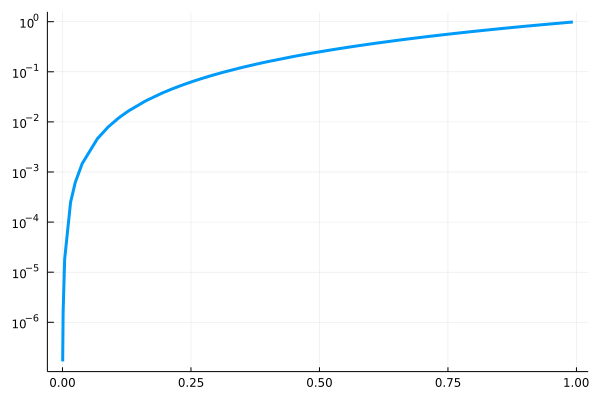

In [9]:
plot(
    ys,
    ys .^ 2,
    seriestype = :line,
    labels = missing,
    yaxis = :log,
    lw = 3
)

At last: You can either spell in English (`colour`) or 'murican (`color`):

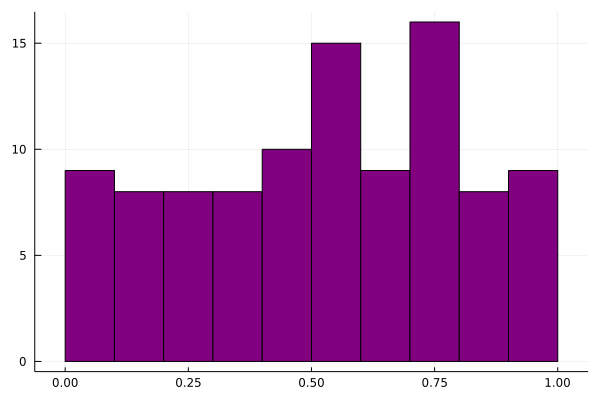

In [10]:
plot(
    ys,
    seriestype = :histogram,
    bins = 10,
    labels = missing,
    colour = :purple
)

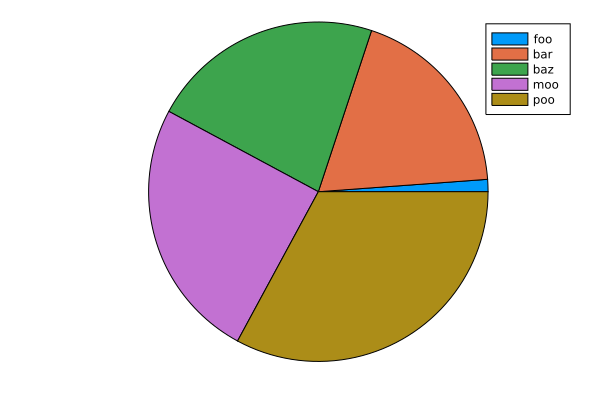

In [11]:
plot(
    ["foo", "bar", "baz", "moo", "poo"],
    sort(ys[1:5]),
    seriestype = :pie
)

Oddly, this seems to do precisely the same thing (Why have two ways to do a thing!?):

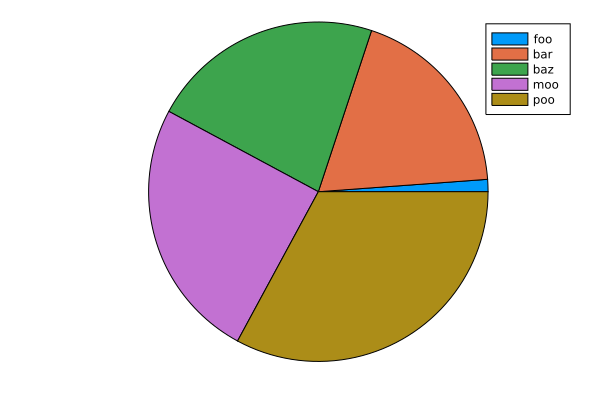

In [12]:
pie(
    ["foo", "bar", "baz", "moo", "poo"],
    sort(ys[1:5]),
)

Actually, these specific-type plot functions seem to have nicer documentation:

In [13]:
? Plots.bar

```
bar(x,y)
bar!(x,y)
```

Make a bar plot of y vs x.

# Arguments

  * `bar_position`: Symbol.  Choose from `:overlay` (default),                  `:stack`.  (warning: May not be implemented fully)
  * `bar_width`: nothing or Number. Width of bars in data               coordinates. When nothing, chooses based on x (or y when               `orientation = :h`).
  * `bar_edges`: Bool.  Align bars to edges (true), or centers               (the default)?
  * `orientation`: Symbol.  Horizontal or vertical orientation                 for bar types.  Values `:h`, `:hor`,                 `:horizontal` correspond to horizontal (sideways,                 anchored to y-axis), and `:v`, `:vert`, and                 `:vertical` correspond to vertical (the default).

# Examples

```julia-repl
julia> bar([1,2,3],[4,5,6],fillcolor=[:red,:green,:blue],fillalpha=[0.2,0.4,0.6])
julia> bar([(1,4),(2,5),(3,6)])
```


In [14]:
using DataFrames
using StatsPlots

In [15]:
foo = DataFrame(
    xs = xs,
    ys = ys
) ;
size(foo)

(100, 2)

Automagical plotting for dataframes via the `@df` macro:

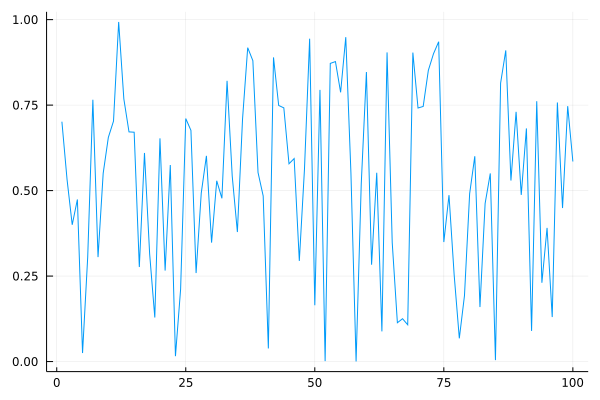

In [16]:
@df foo plot(
    :xs,
    :ys,
    labels = missing
)

You can just plot other things, as well ... not sure how many things or what the limitations are ...

In [17]:
using Distributions

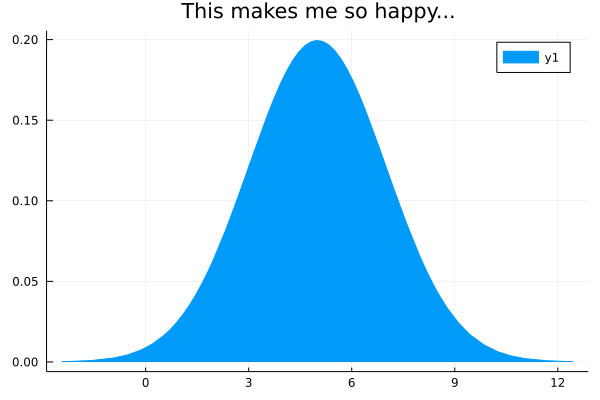

In [18]:
normPlot = plot(
    Normal(5, 2),
    title = "This makes me so happy...",
    fill = true
)

In [19]:
? Plots.savefig

```
savefig([plot,] filename)
```

Save a Plot (the current plot if `plot` is not passed) to file. The file type is inferred from the file extension. All backends support png and pdf file types, some also support svg, ps, eps, html and tex.


Uncomment this to actually render out a plot to file:

In [20]:
# savefig(normPlot, "/tmp/normPlot.png")